In [27]:
import joblib
from collections import defaultdict
def default_float_dict():
    return defaultdict(float)
metrics_results = joblib.load('metrics_results.pkl')

incrx_results = metrics_results['Incx']
d_rise_results = metrics_results['D-RISE']

In [28]:
metrics = list(metrics_results['Incx']['KITTI']['RT_DETR'].keys())
metrics

['Insertion', 'Deletion', 'EPG', 'Explanation Proportion', 'Time']

In [29]:
models = list(metrics_results['Incx']['KITTI'].keys())
models

['YOLO', 'RT_DETR', 'FASTER_RCNN']

In [30]:
datasets = list(metrics_results['Incx'].keys())
datasets

['BDD100K', 'KITTI', 'VIPER', 'NUSCENES']

In [32]:
import pandas as pd
import numpy as np
from incx.models.model_enum import ModelEnum
from datasets.dataset_enum import DatasetEnum


results = []
for dataset in DatasetEnum:
    for model in ModelEnum:
        for metric in metrics:
            filtered_values_incrx = [x for val in incrx_results[dataset.name][model.name][metric].values() for x in val.values()]
            average_value_incrx = np.mean(filtered_values_incrx)
            std_incrx = np.std(filtered_values_incrx)
            results.append({
                'Source': 'incrx_results',
                'Model': dataset.name + ' ' + model.name + ' incx',
                'Metric': metric,
                'Average': average_value_incrx,
                'STD': std_incrx
            })
            
            filtered_values_d_rise = [x for val in d_rise_results[dataset.name][model.name][metric].values() for x in val.values()]
            average_value_d_rise = np.mean(filtered_values_d_rise)
            std_d_rise = np.std(filtered_values_d_rise)
            results.append({
                'Source': 'd_rise_results',
                'Model': dataset.name + ' ' + model.name + ' d_rise',
                'Metric': metric,
                'Average': average_value_d_rise,
                'STD': std_d_rise
            })

df = pd.DataFrame(results)

pivot_df_avg = df.pivot_table(index='Model', columns=['Metric'], values='Average')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]
pivot_df_std = df.pivot_table(index='Model', columns=['Metric'], values='STD')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]


c:\repos\IncX\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\repos\IncX\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\repos\IncX\.venv\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\repos\IncX\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\repos\IncX\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [33]:
print("Pivot Table of Averages:")
pivot_df_avg

Pivot Table of Averages:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
BDD100K RT_DETR d_rise,0.929167,0.059681,0.281267,0.038342,166.020735
BDD100K RT_DETR incx,0.924748,0.052907,0.290490,0.034640,0.200401
BDD100K YOLO d_rise,0.767822,0.032720,0.274882,0.097564,48.479425
BDD100K YOLO incx,0.782988,0.040983,0.307477,0.081083,2.262898
KITTI FASTER_RCNN d_rise,0.970729,0.023596,0.112144,0.006134,47.570840
KITTI FASTER_RCNN incx,0.961793,0.025271,0.155996,0.004443,0.134164
KITTI RT_DETR d_rise,NaN,NaN,0.083267,0.011347,100.382132
KITTI RT_DETR incx,NaN,NaN,0.108963,0.010790,6.216958
KITTI YOLO d_rise,NaN,NaN,0.141634,0.060261,33.402533


In [34]:
print("Pivot Table of Standard deviations:")
pivot_df_std

Pivot Table of Standard deviations:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
BDD100K RT_DETR d_rise,0.045184,0.031284,0.127280,0.024117,253.696654
BDD100K RT_DETR incx,0.046507,0.024629,0.132542,0.038754,0.006448
BDD100K YOLO d_rise,0.219293,0.019672,0.105711,0.135463,31.574149
BDD100K YOLO incx,0.198181,0.052377,0.097665,0.118508,17.301419
KITTI FASTER_RCNN d_rise,0.014519,0.017219,0.083560,0.003937,10.225674
KITTI FASTER_RCNN incx,0.018737,0.016921,0.099903,0.003176,0.048643
KITTI RT_DETR d_rise,NaN,NaN,0.072846,0.005978,157.858386
KITTI RT_DETR incx,NaN,NaN,0.056930,0.006494,21.620242
KITTI YOLO d_rise,NaN,NaN,0.128434,0.056574,16.199201


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15800\1647383307.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)


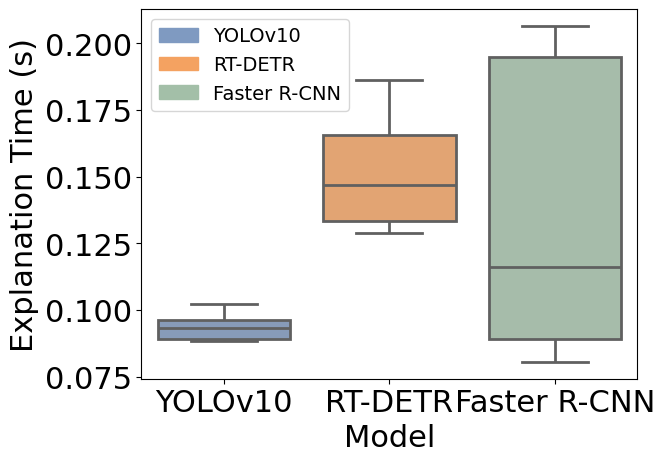

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def filter_array_2(array):
    return array

yolo = [x for val in incrx_results['KITTI']['YOLO']['Time'].values() for x in val.values()]
rtdetr = [x for val in incrx_results['KITTI']['RT_DETR']['Time'].values() for x in val.values()]
fasterrcnn = [x for val in incrx_results['KITTI']['FASTER_RCNN']['Time'].values() for x in val.values()]

data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})


data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

fig, ax = plt.subplots()

sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)

ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=22)

handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles, loc='best', fontsize=14, title_fontsize='15')

plt.savefig("blob/incrx_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15800\32981558.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)


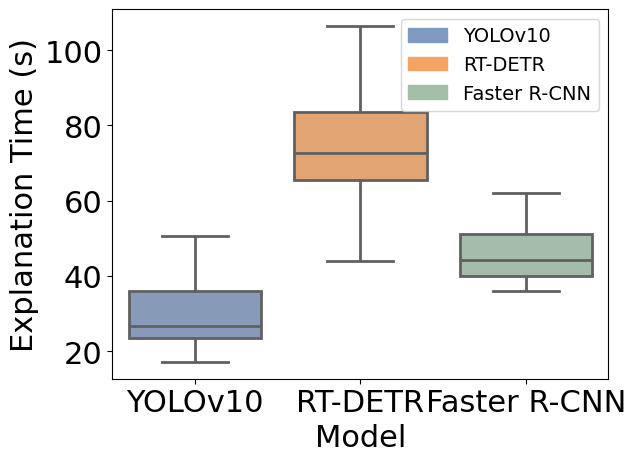

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

yolo = [x for val in d_rise_results['KITTI']['YOLO']['Time'].values() for x in val.values()]
rtdetr = [x for val in d_rise_results['KITTI']['RT_DETR']['Time'].values() for x in val.values()]
fasterrcnn = [x for val in d_rise_results['KITTI']['FASTER_RCNN']['Time'].values() for x in val.values()]

data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})

data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

fig, ax = plt.subplots()

sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)

ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=22)

handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles,  loc='best', fontsize=14, title_fontsize='15')

plt.savefig("blob/drise_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

In [37]:
import joblib
from incx.models.model_enum import ModelEnum
import numpy as np
import pandas as pd

# Load the comparison results from a pickle file
with open('comparison_results.pkl', 'rb') as f:
    comparison_results = joblib.load(f)

def filter_zeroes(array):
    return array[array != 0]

data = []
for dataset in DatasetEnum:
    for model in ModelEnum:
        pearson_filtered = [x for val in comparison_results[dataset.name][model.name]['Pearson'].values() for x in val.values()]
        structural_filtered = [x for val in comparison_results[dataset.name][model.name]['Structural'].values() for x in val.values()]
        dice_filtered = [x for val in comparison_results[dataset.name][model.name]['Dice'].values() for x in val.values()]
        jaccard_filtered = [x for val in comparison_results[dataset.name][model.name]['Jaccard'].values() for x in val.values()]
        
        pearson_mean = np.mean(pearson_filtered)
        structural_mean = np.mean(structural_filtered)
        dice_mean = np.mean(dice_filtered)
        jaccard_mean = np.mean(jaccard_filtered)
        
        pearson_std = np.std(pearson_filtered)
        structural_std = np.std(structural_filtered)
        dice_std = np.std(dice_filtered)
        jaccard_std = np.std(jaccard_filtered)
        
        data.append({
            'Model': dataset.name + ' ' + model.name,
            'Correlation Coefficient Mean': pearson_mean,
            'Correlation Coefficient Std': pearson_std,
            'Structural Mean': structural_mean,
            'Structural Std': structural_std,
            'Jaccard Mean': jaccard_mean,
            'Jaccard Std': jaccard_std,
            'Dice Mean': dice_mean,
            'Dice Std': dice_std
        })

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df.sort_index(inplace=True)
df

,Correlation Coefficient Mean,Correlation Coefficient Std,Structural Mean,Structural Std,Jaccard Mean,Jaccard Std,Dice Mean,Dice Std
Model,,,,,,,,
BDD100K FASTER_RCNN,0.939460,0.070345,0.859866,0.121467,0.330774,0.267033,0.437110,0.305011
BDD100K RT_DETR,0.964811,0.046603,0.838288,0.160097,0.558177,0.295476,0.661116,0.295286
BDD100K YOLO,0.930671,0.087247,0.744656,0.242911,0.665974,0.167717,0.785346,0.142631
KITTI FASTER_RCNN,0.907116,0.068289,0.583244,0.313109,0.432326,0.261615,0.553490,0.280657
KITTI RT_DETR,0.911831,0.064581,0.562536,0.298144,0.565482,0.202666,0.699569,0.180213
KITTI YOLO,0.930814,0.051645,0.747051,0.204172,0.686104,0.178202,0.799264,0.139203
NUSCENES FASTER_RCNN,0.943294,0.059123,0.828418,0.188657,0.560332,0.275072,0.677366,0.235884
NUSCENES RT_DETR,0.902848,0.109192,0.802257,0.179418,0.538675,0.329276,0.632460,0.324003
NUSCENES YOLO,0.922124,0.094532,0.849437,0.152342,0.714366,0.278534,0.796708,0.228273
